In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import  minmax_scale
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline , make_pipeline

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Scikit Learn Pipelines
Pipelines chains together multiple steps so that output of each step is used as imput to the next step.
Pipelines makes it easy to apply the same preprocessing to train test split



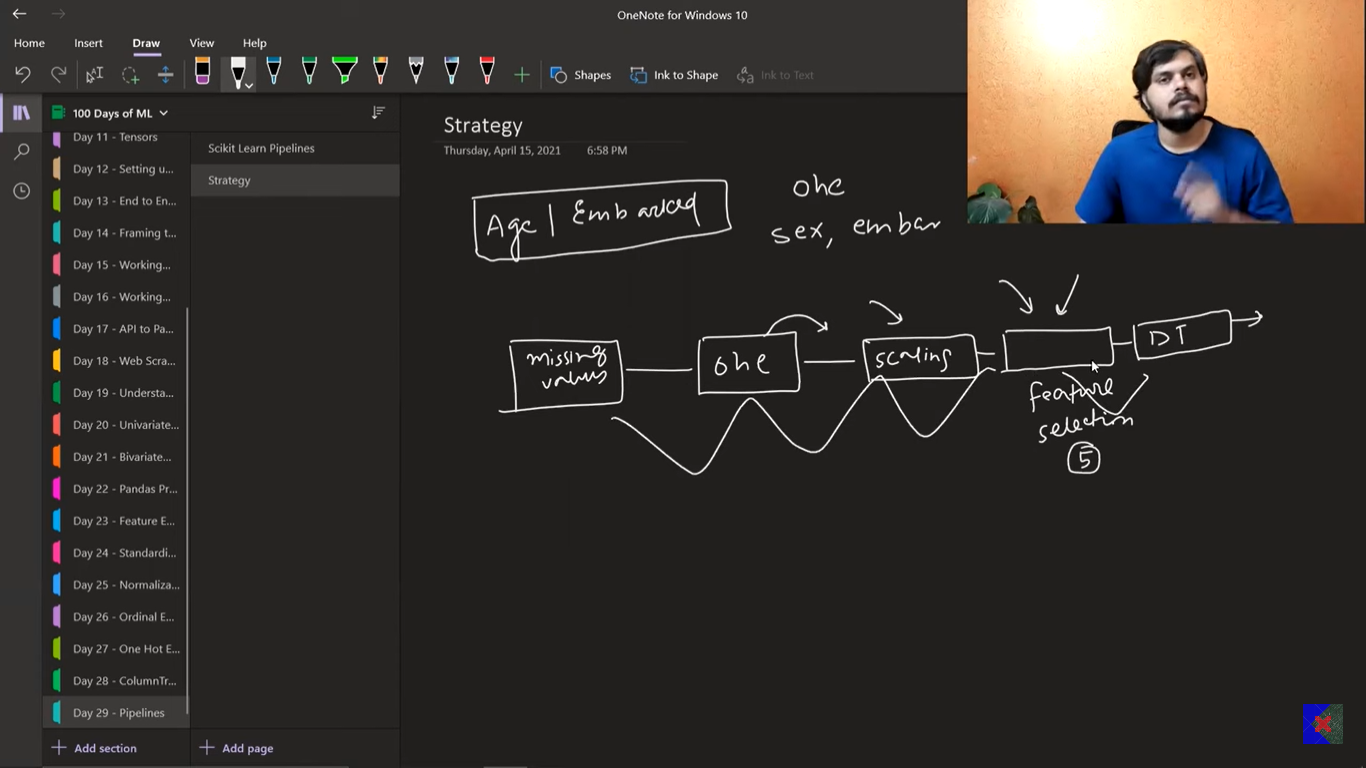

# Let's Plan

In [5]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
#Step1-> Train/Test split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(columns=["Survived"]),df["Survived"],test_size=0.2,random_state=42)

In [8]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [9]:
Y_train.sample()

253    0
Name: Survived, dtype: int64

In [10]:
#Step 2 -> Imputaion transformer
trf1=ColumnTransformer([
    ("impute_age",SimpleImputer(),[2]),
    ("impute_embarked",SimpleImputer(strategy="most_frequent"),[6])
],remainder="passthrough"
)


### We are using the index for column rather than using its name <br> by using index output generated by the step may act as a array for the next step<br> If we use name of the column instead it will raise errors <br> So it is good strategy to use index of the column intsead of its name . <br> As it will work on the numpy array as it is.


In [11]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_age', SimpleImputer(), [2]),
                                ('impute_embarked',
                                 SimpleImputer(strategy='most_frequent'),
                                 [6])])

In [12]:
#step3 -> OnehotEncoding
trf2=ColumnTransformer([
    ("ohe_sex_embarked",OneHotEncoder(sparse=False,handle_unknown="ignore"),[1,6])
],remainder="passthrough")

In [13]:
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_sex_embarked',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 [1, 6])])

In [14]:
#step4->Scalling
from sklearn.preprocessing import MinMaxScaler
trf3=ColumnTransformer([
    ("scale",MinMaxScaler(),slice(0,10))
])

In [15]:
trf3

ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))])

In [16]:
# step5 -> Feature Selection
trf4=SelectKBest(score_func=chi2,k=8)

In [17]:
trf4

SelectKBest(k=8, score_func=<function chi2 at 0x0000020357D32700>)

In [18]:
#step6- -> Train the Model
trf5=DecisionTreeClassifier()

# Create a Pipeline

In [19]:
pipe=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3),
    ("trf4",trf4),
    ("trf5",trf5)
])

# Pipeline Vs make_pipeline

Pipeline requires naming of steps, make_pipeline does not.

(Same applies to ColumnTransformer vs make_column_transformer)

In [20]:
#ALternate Syntax
# pipe=make_pipeline(f1,trf2,trf3,trf4,trf5)

In [21]:
#train
pipe.fit(X_train,Y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x0000020357D32700>)),
                ('trf5', DecisionTreeClassifier())])

## Displaying Our Pipelines

# Exploring the Pipeline

In [22]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x0000020357D32700>),
 'trf5': DecisionTreeClassifier()}

In [23]:
#display pipeline
from sklearn import set_config
set_config(display='diagram')

In [24]:
#predict
Y_pred=pipe.predict(X_test)

In [25]:
Y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.6256983240223464

# Cross Validation using Pipeline

In [27]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, Y_train, cv=5, scoring='accuracy').mean()

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

0.6391214419383433

# Grid Search using Pipeline

In [28]:
# gridsearchcv
params = {
    'trf5__max_depth':[1,2,3,4,5,None]
}

In [29]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x0000020357D32700>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [30]:
grid.best_score_

0.6391214419383433

In [31]:
grid.best_params_

{'trf5__max_depth': 2}

# Exporting the Pipelines

In [32]:
#exproting
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

#### This way we have succesfully converted our model into binary file and convert it using pickle and export it for production😎😎

# Conclude<br> (see the next file predict using pipe)